# Lending Club Case Study

### Group Facilitator - Budhaditya Saha
### Group Member - Manohar Simons

## Step 1: Data understanding

Import the required libraries

In [1]:
import chardet
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import types

Determine the encoding of the csv file

In [2]:
def detect_encoding(filename):
    with open(filename, mode="rb") as rawdata:
        result = chardet.detect(rawdata.read())

    print(result)

# Uncomment to determine the encoding of the file
#detect_encoding("loan.csv")

Read the csv file using the appropriate encoding

In [3]:
loan = pd.read_csv("loan.csv", encoding="utf-8")

C:\Users\a94010283\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
# determine the number of rows and columns
loan.shape

(39717, 111)

In [6]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
# check the datatypes of various columns
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

Truncate and modify the data type of the interest rate column

In [8]:
loan["int_rate"] = loan["int_rate"].str[:-1].astype(float)
loan["int_rate"].dtype
print(loan["int_rate"].head())

0    10.65
1    15.27
2    15.96
3    13.49
4    12.69
Name: int_rate, dtype: float64


In [9]:
loan.emp_length.value_counts(dropna=False)

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
NaN          1075
Name: emp_length, dtype: int64

Convert employee length to numeric

Assumption: The employment length column has 2.67% n/a values. Also all but 18 rows that have empolyment length as n/a also have the employer title as blank. Which probably implies that these applicants are not employed and we can treat these values as 0's.

In [10]:
loan["emp_length"] = loan["emp_length"].fillna("0 years")

loan[loan["emp_length"]=="0 years"].shape

(1075, 111)

In [11]:
loan["emp_length"]=loan.emp_length.str.replace('[\+\<]','').str.strip().str.replace('["year","years"]','', regex=True)
loan['emp_length']=(loan['emp_length']).astype(int)
loan.emp_length.dtype

dtype('int32')

The target column is the loan status. We retain the fully paid and charged off loans and drop loans that have a current status

In [12]:
loan = loan[loan["loan_status"] != "Current"]

Convert fully paid and charged off loans to 0's an 1's

In [13]:
loan["loan_status"] = (loan["loan_status"] == "Charged Off").astype(int)

## Step 2: Data cleaning

Determine the number of null columns

In [14]:
# determine the number of null columns
pd.set_option('display.max_rows', None)
null_columns = loan.count(axis="rows")
null_columns = null_columns[null_columns == 0]
null_columns.shape

(55,)

There are 54 columns that do not have any data. So let's drop them.

In [15]:
loan = loan.drop(columns=null_columns.index)
loan.shape

(38577, 56)

These are the empty columns that we have dropped

In [16]:
null_columns

next_pymnt_d                      0
mths_since_last_major_derog       0
annual_inc_joint                  0
dti_joint                         0
verification_status_joint         0
tot_coll_amt                      0
tot_cur_bal                       0
open_acc_6m                       0
open_il_6m                        0
open_il_12m                       0
open_il_24m                       0
mths_since_rcnt_il                0
total_bal_il                      0
il_util                           0
open_rv_12m                       0
open_rv_24m                       0
max_bal_bc                        0
all_util                          0
total_rev_hi_lim                  0
inq_fi                            0
total_cu_tl                       0
inq_last_12m                      0
acc_open_past_24mths              0
avg_cur_bal                       0
bc_open_to_buy                    0
bc_util                           0
mo_sin_old_il_acct                0
mo_sin_old_rev_tl_op        

Check for columns that have only 0's in it

In [17]:
loan.columns[(loan == 0).all()]

Index(['out_prncp', 'out_prncp_inv', 'acc_now_delinq', 'delinq_amnt'], dtype='object')

Drop the columns that have all 0's in it

In [18]:
loan = loan.drop(columns=loan.columns[(loan == 0).all()])
loan.shape

(38577, 52)

Defining a function to drop unecessary columns

In [19]:
def drop_columns_on_dataframe(df, columns):
    initial_count = df.shape[1]
    df = df.drop(columns=columns_to_drop)
    print("Number of columns dropped: {}".format(initial_count - df.shape[1]))
    print("Columns remaining: {}".format(df.shape[1]))
    return df

Dropping a few other columns that we do not need for our analysis

In [20]:
columns_to_drop = ["emp_title", "pymnt_plan", "url", "desc", "title", "zip_code"]
loan = drop_columns_on_dataframe(loan, columns_to_drop)

Number of columns dropped: 6
Columns remaining: 46


Droping the customer behavioural variables

In [21]:
columns_to_drop = ["delinq_2yrs", "earliest_cr_line", "inq_last_6mths", "mths_since_last_delinq", "mths_since_last_record", "open_acc", "pub_rec", "revol_bal", "revol_util", "total_acc", "initial_list_status", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "last_credit_pull_d", "collections_12_mths_ex_med", "chargeoff_within_12_mths", "pub_rec_bankruptcies", "tax_liens"]
loan = drop_columns_on_dataframe(loan, columns_to_drop)

Number of columns dropped: 21
Columns remaining: 25


Check all the other columns for missing values

In [22]:
nullseries = loan.isnull().sum()
print(nullseries[nullseries > 0])
print(loan.shape)

Series([], dtype: int64)
(38577, 25)


## Step 3: Data Analysis 

### Univariate analysis on categorical variable

Define a function to display barplots

In [23]:
def showBarplot(x, y, data, estimator, title, xlabel, ylabel, xticks, figsize):
    plt.figure(figsize=figsize)
    if type(estimator) == type(lambda x:x):
        ax = sns.barplot(x=x, y=y, data=data, estimator=estimator)
    else:
        ax = sns.barplot(x=x, y=y, data=data)
    max = 0
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2.0, p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', xytext=(0, 20),
         textcoords='offset points')
        if p.get_height() > max:
            max = p.get_height()
    ax.set_ylim(0, 1.15*max )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if xticks != []:
        ax.set_xticklabels(xticks)
    plt.show(ax)

Define a function to display boxplots to compare good and bad loans

In [24]:
#Create a user defined function to show a box plot that comapres bad loans with good loans
def boxplot(xparameter, yparameter, showfliers):
    sns.boxplot(y=yparameter, 
                x=xparameter,
                data=loan, 
                hue="loan_status",
                showfliers=showfliers)
    plt.show()

Define a function to display barplots

In [25]:
#create user defined function for bar plots for unicariate analysis
def snsplot(column_name, size):
    plt.figure(figsize=size)
    sns.barplot(x=column_name, y="loan_status", data=loan)
    plt.show()

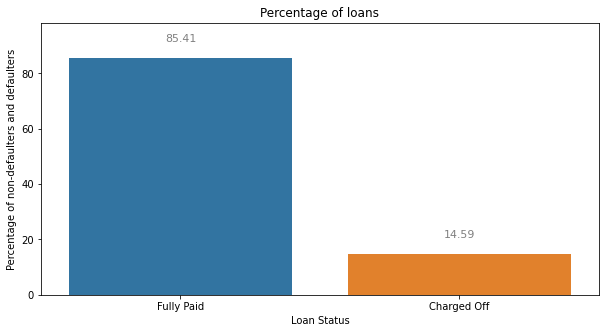

In [26]:
showBarplot("loan_status", 
            "loan_status", 
            loan, 
            lambda x: len(x)*100/float(len(loan)), 
            "Percentage of loans", 
            "Loan Status",
            "Percentage of non-defaulters and defaulters",
            ["Fully Paid", "Charged Off"],
            [10,5])

#### Term of the loan

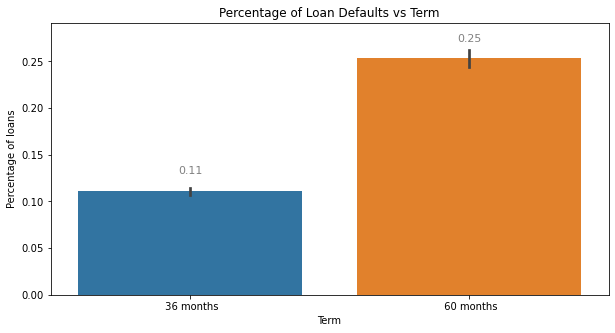

In [27]:
showBarplot("term", 
            "loan_status", 
            loan, 
            None, 
            "Percentage of Loan Defaults vs Term",
            "Term",
            "Percentage of loans",
            [],
            [10,5])

*36 months:* 11% of applicants default

60 months: 25% of applicants default 

#### Grade of the loan

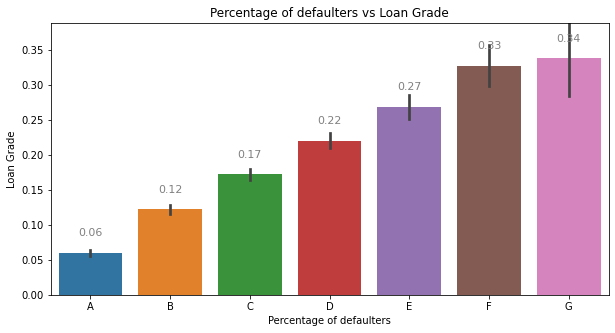

In [28]:
showBarplot("grade", 
            "loan_status", 
            loan.sort_values("grade"), 
            None, 
            "Percentage of defaulters vs Loan Grade", 
            "Percentage of defaulters",
            "Loan Grade",
            [],
            [10,5])

The percentage of defaults increases as the loan grade moves from A to G 

#### Purpose of the loan

In [29]:
loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

In [30]:
# top 5 loan purpose

top5loan = loan[(loan.purpose=='debt_consolidation') |
            (loan.purpose=='credit_card') |
            (loan.purpose=='other') |
            (loan.purpose=='home_improvement') |
            (loan.purpose=='major_purchase')]

In [31]:
top5loan['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
Name: purpose, dtype: int64

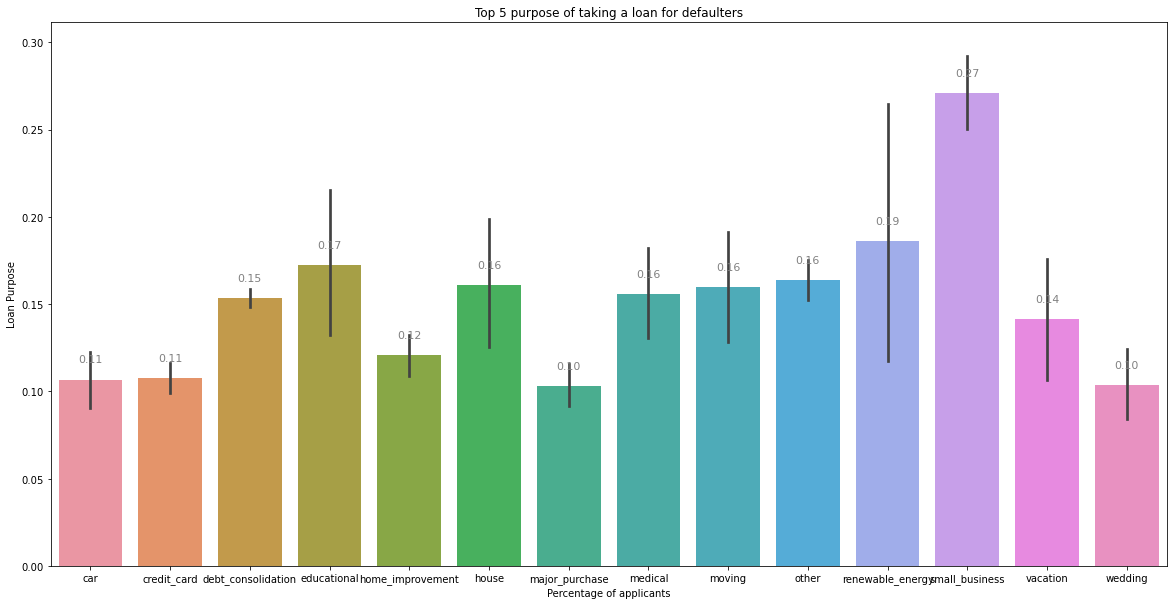

In [32]:
showBarplot("purpose", 
            "loan_status", 
            loan.sort_values("purpose"), 
            None, 
            "Top 5 purpose of taking a loan for defaulters", 
            "Percentage of applicants",
            "Loan Purpose",
            [],
            [20,10])

Loans taken for the purpose of a small business have the highes rate of default

### Univariate analysis on numerical variables

#### Principal of the loan

In [33]:
loan.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [34]:
loan['loan_category'] = pd.qcut(loan['loan_amnt'], q=10, precision=0)

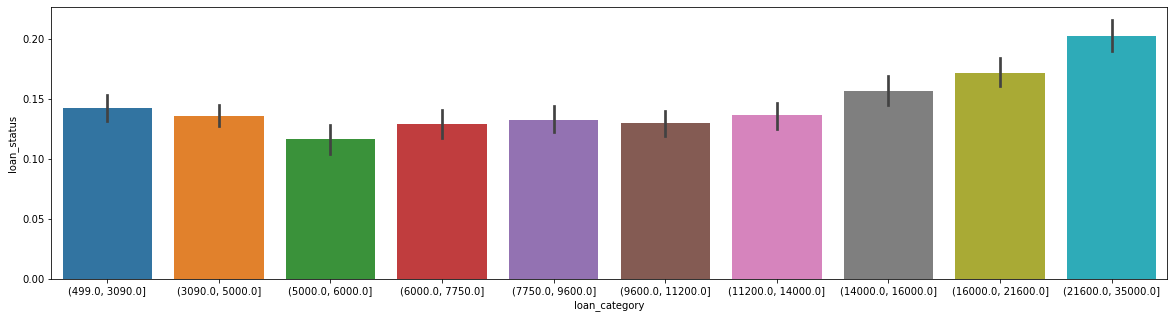

In [35]:
snsplot('loan_category', [20,5])

#### Debt to income ratio

In [36]:
loan['dti'].describe()

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [37]:
loan['dti_category'] = pd.qcut(loan['dti'], q=4, precision=0)

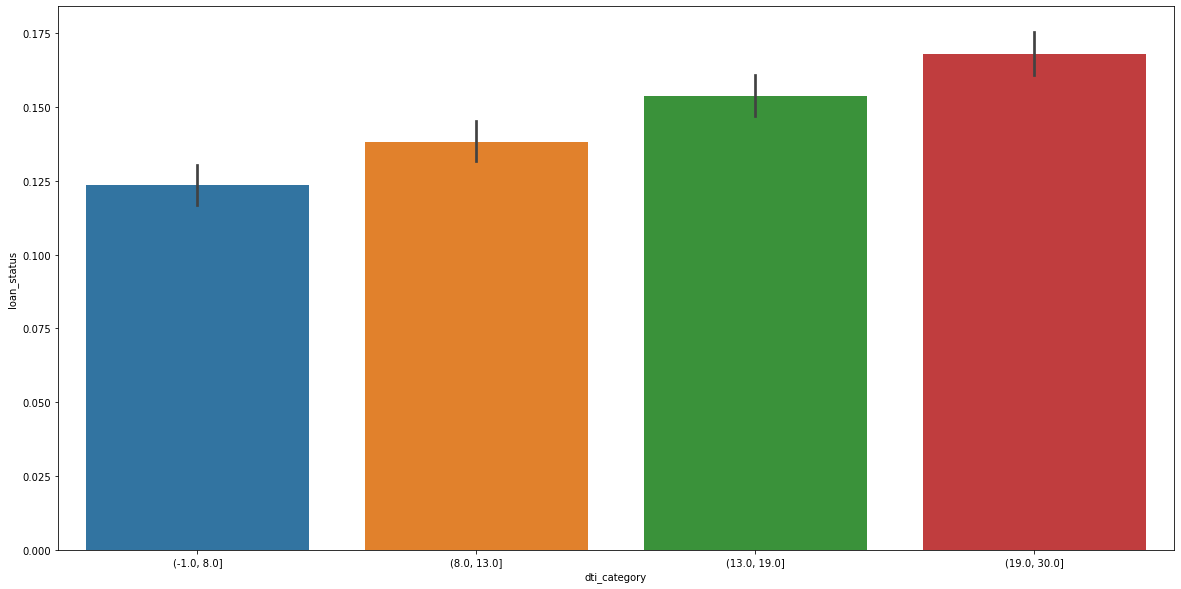

In [38]:
snsplot('dti_category', [20,10])

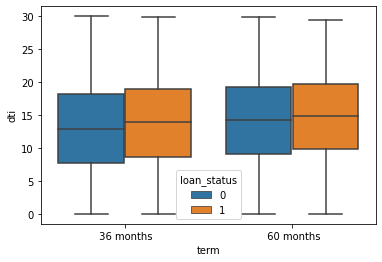

In [39]:
boxplot("term", "dti", True)

#### Annual Income

In [40]:
loan['annual_inc_cat'] = pd.qcut(loan['annual_inc'], q=4, precision=0)

In [41]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,policy_code,application_type,loan_category,dti_category,annual_inc_cat
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,27.65,5863.155187,5833.84,5000.00,863.16,1,INDIVIDUAL,"(3090.0, 5000.0]","(19.0, 30.0]","(3999.0, 40000.0]"
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1.00,1008.710000,1008.71,456.46,435.17,1,INDIVIDUAL,"(499.0, 3090.0]","(-1.0, 8.0]","(3999.0, 40000.0]"
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,8.72,3005.666844,3005.67,2400.00,605.67,1,INDIVIDUAL,"(499.0, 3090.0]","(8.0, 13.0]","(3999.0, 40000.0]"
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,20.00,12231.890000,12231.89,10000.00,2214.92,1,INDIVIDUAL,"(9600.0, 11200.0]","(19.0, 30.0]","(40000.0, 58868.0]"
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,11.20,5632.210000,5632.21,5000.00,632.21,1,INDIVIDUAL,"(3090.0, 5000.0]","(8.0, 13.0]","(3999.0, 40000.0]"


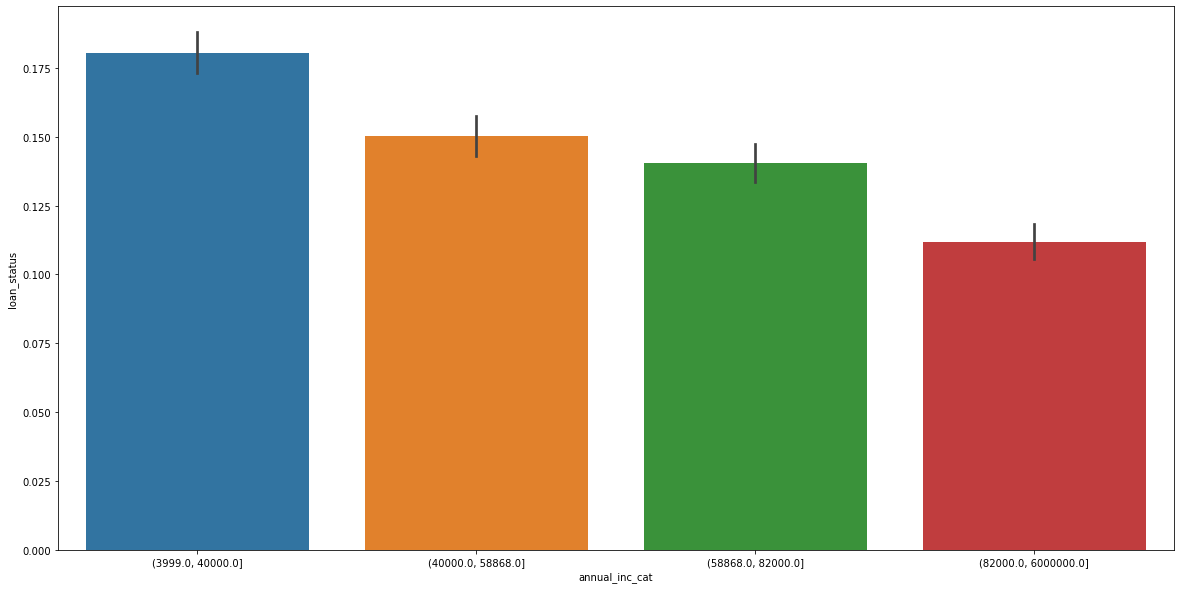

In [42]:
snsplot('annual_inc_cat', [20,10])

People with a lower annual income tend to default

In [43]:
loan['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

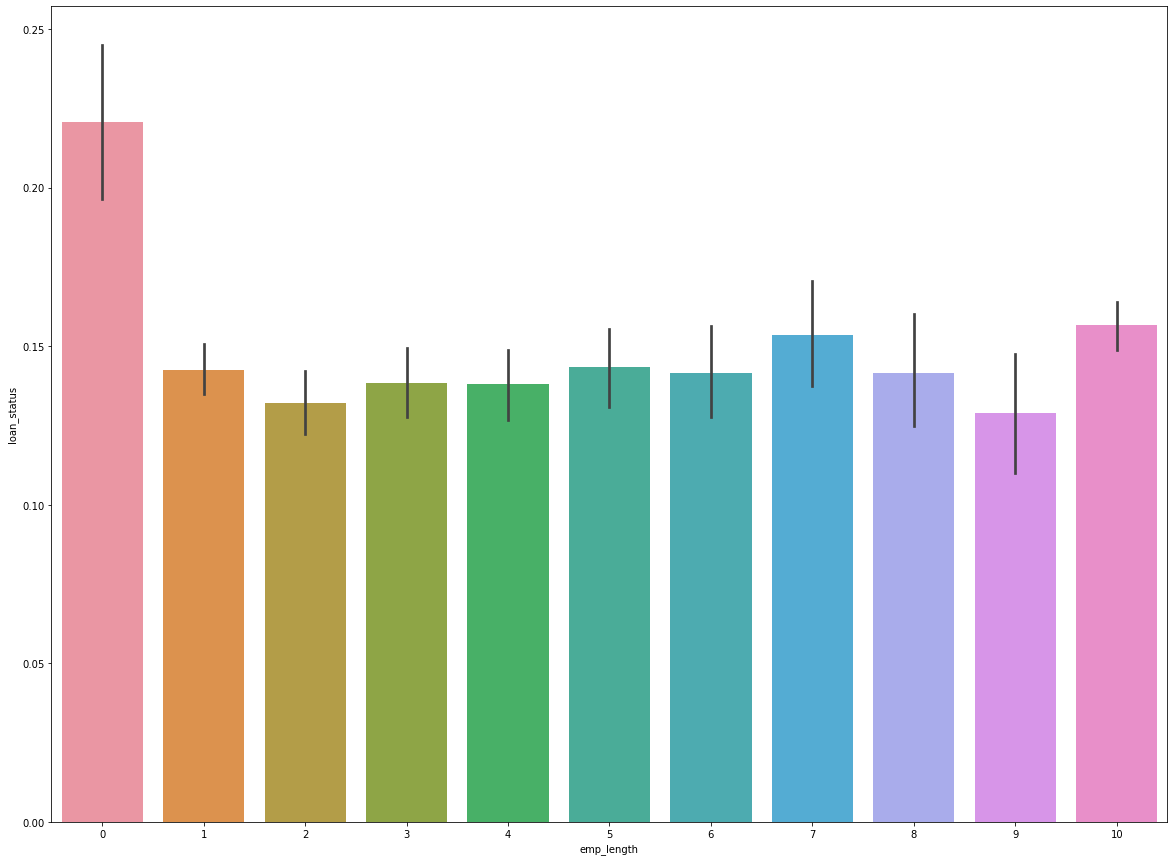

In [44]:
snsplot('emp_length',[20,15])

People who have 0 years of employment have a strong tendancy to default

### Bivariate analysis

#### Grade

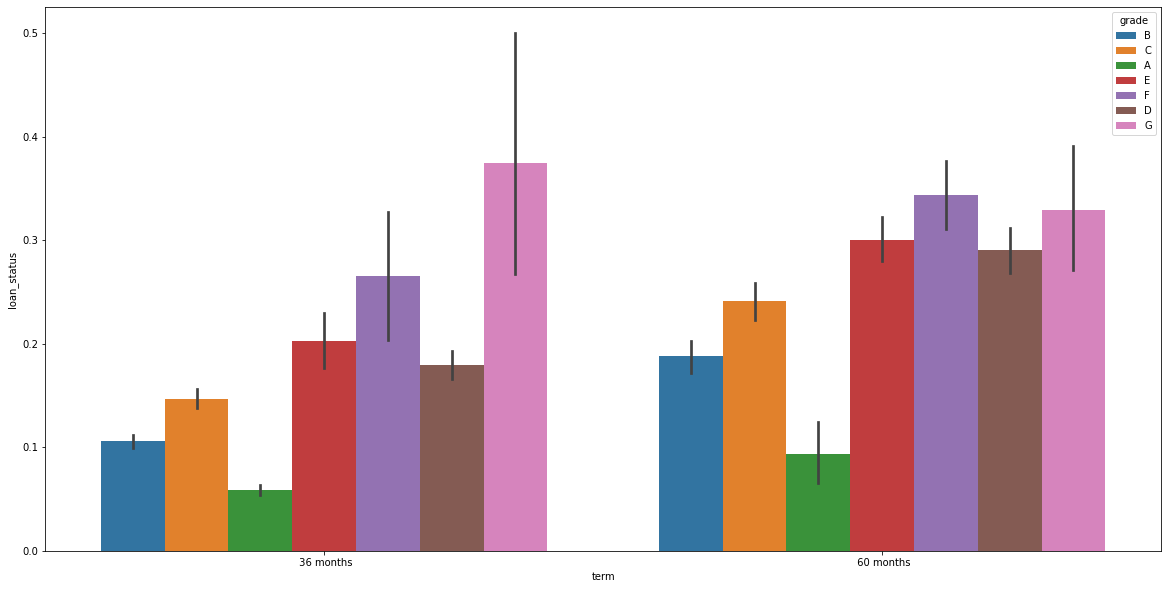

In [45]:
plt.figure(figsize=[20,10])
sns.barplot(x="term", y="loan_status", hue="grade", data=loan)
plt.show()

#### Subgrade

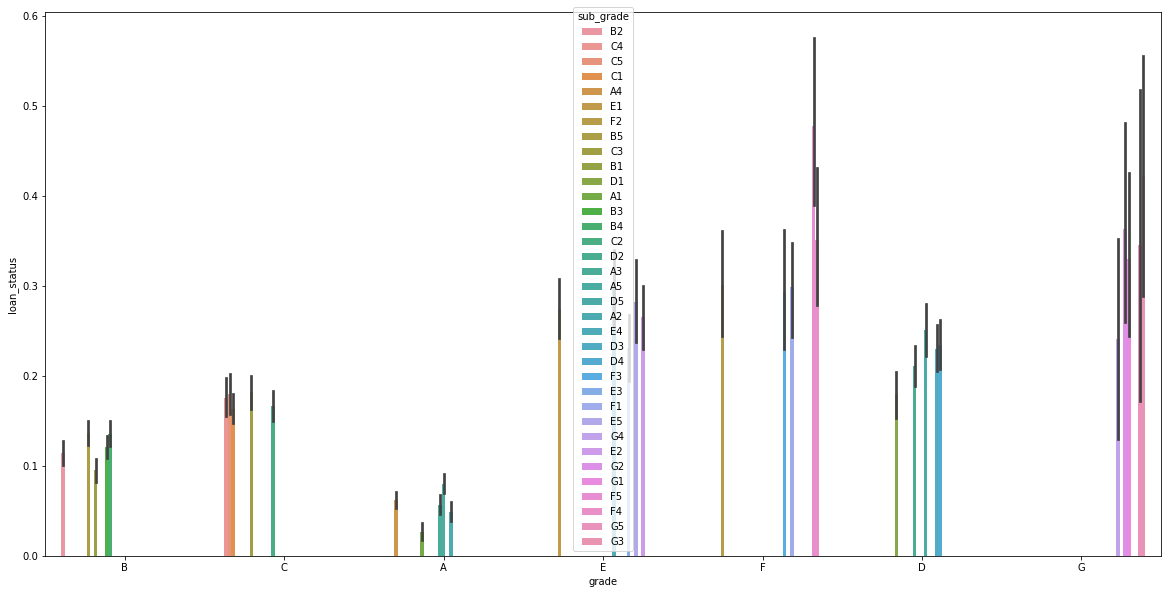

In [46]:
plt.figure(figsize=[20,10])
sns.barplot(x="grade", y="loan_status", hue="sub_grade", data=loan)
plt.show()

#### Verification Status

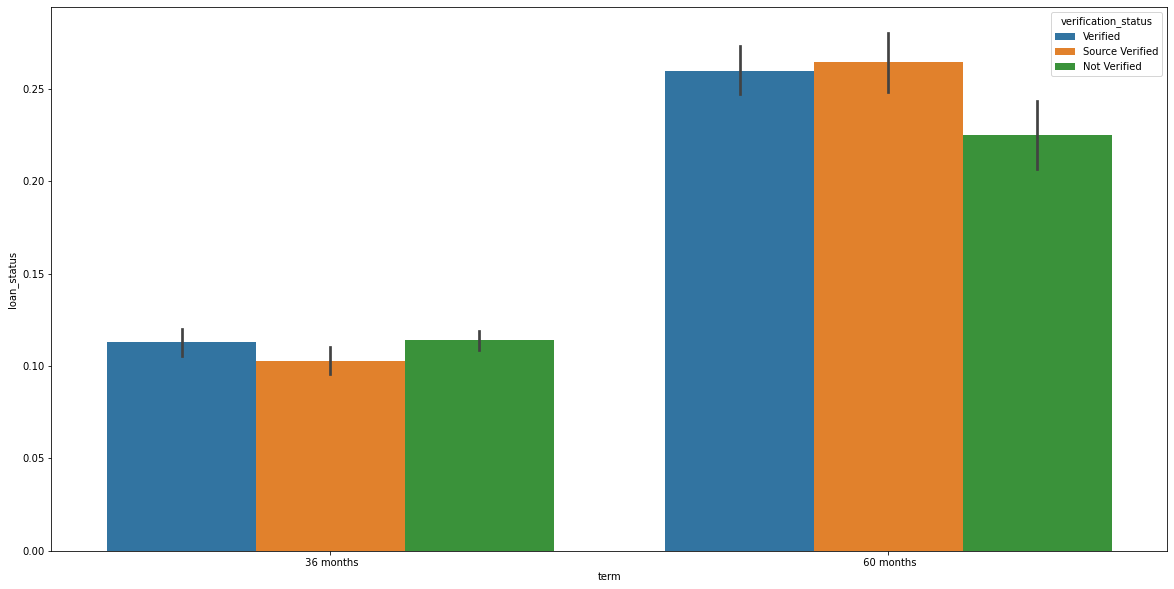

In [47]:
plt.figure(figsize=[20,10])
sns.barplot(x="term", y="loan_status", hue="verification_status", data=loan)
plt.show()

Verification status does not seem to be a good predictor of a default

#### Interest rates

In [48]:
loan['int_rate_category'] = pd.qcut(loan['int_rate'], q=4, precision=0)

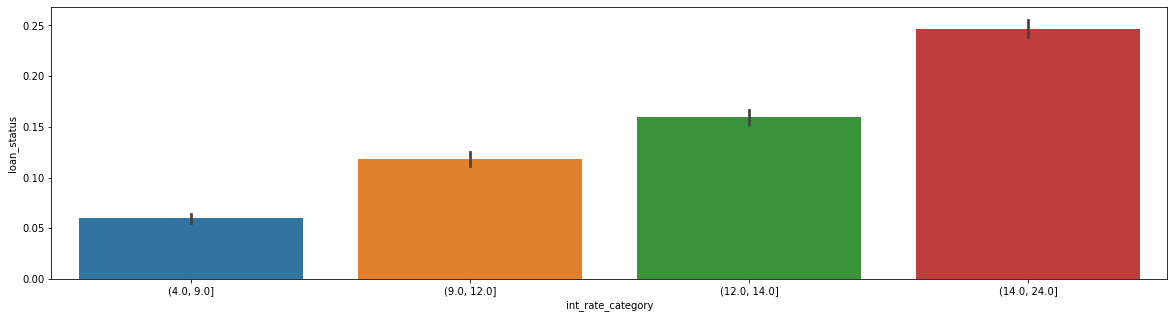

In [49]:
snsplot('int_rate_category', [20,5])

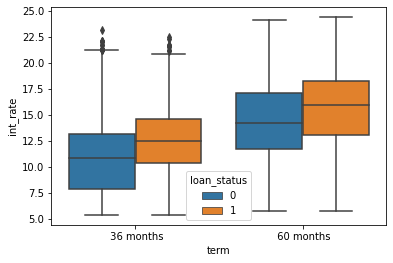

In [50]:
boxplot("term", "int_rate", True)

Loans that are defaulted have a higher rate of interest than loans that are repayed

#### Principal

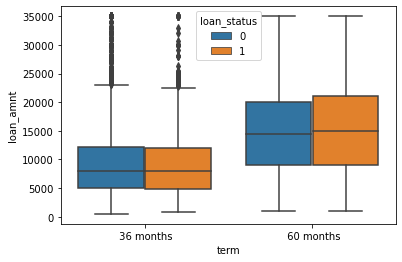

In [51]:
boxplot("term", "loan_amnt", True)

The principal does not seem to be a predictor of a default

#### Installment

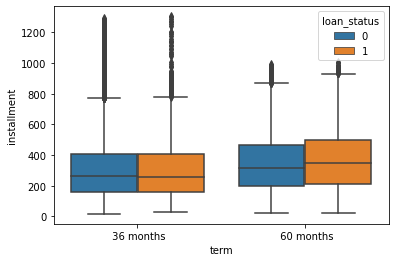

In [52]:
boxplot("term", "installment", True)

People paying higher installment on longer term loans have a larger tendancy to default

#### Annual Income

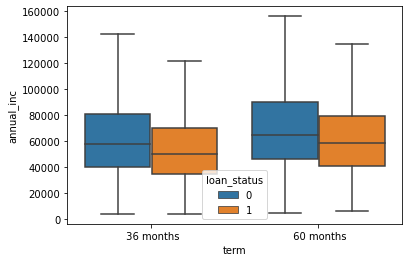

In [53]:
boxplot("term", "annual_inc", False)

#### Home Ownership

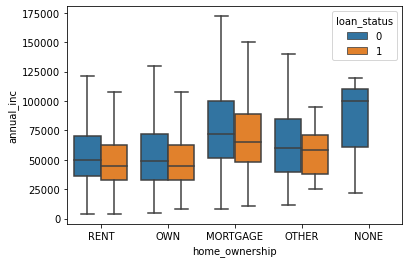

In [54]:
boxplot("home_ownership", "annual_inc", False)

People who take shorter term loans tend to have a higher annual incomes than those who take longer term loans across all home ownership categories

#### Purpose of Loan v/s Interest rate v/s employment length

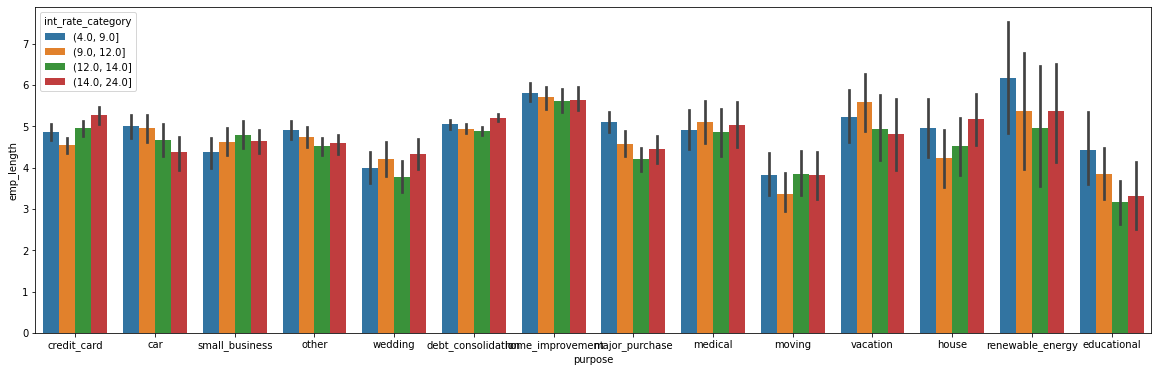

In [55]:
plt.figure(figsize=[20,6])
sns.barplot(x="purpose", y="emp_length", hue="int_rate_category", data=loan)
plt.show()

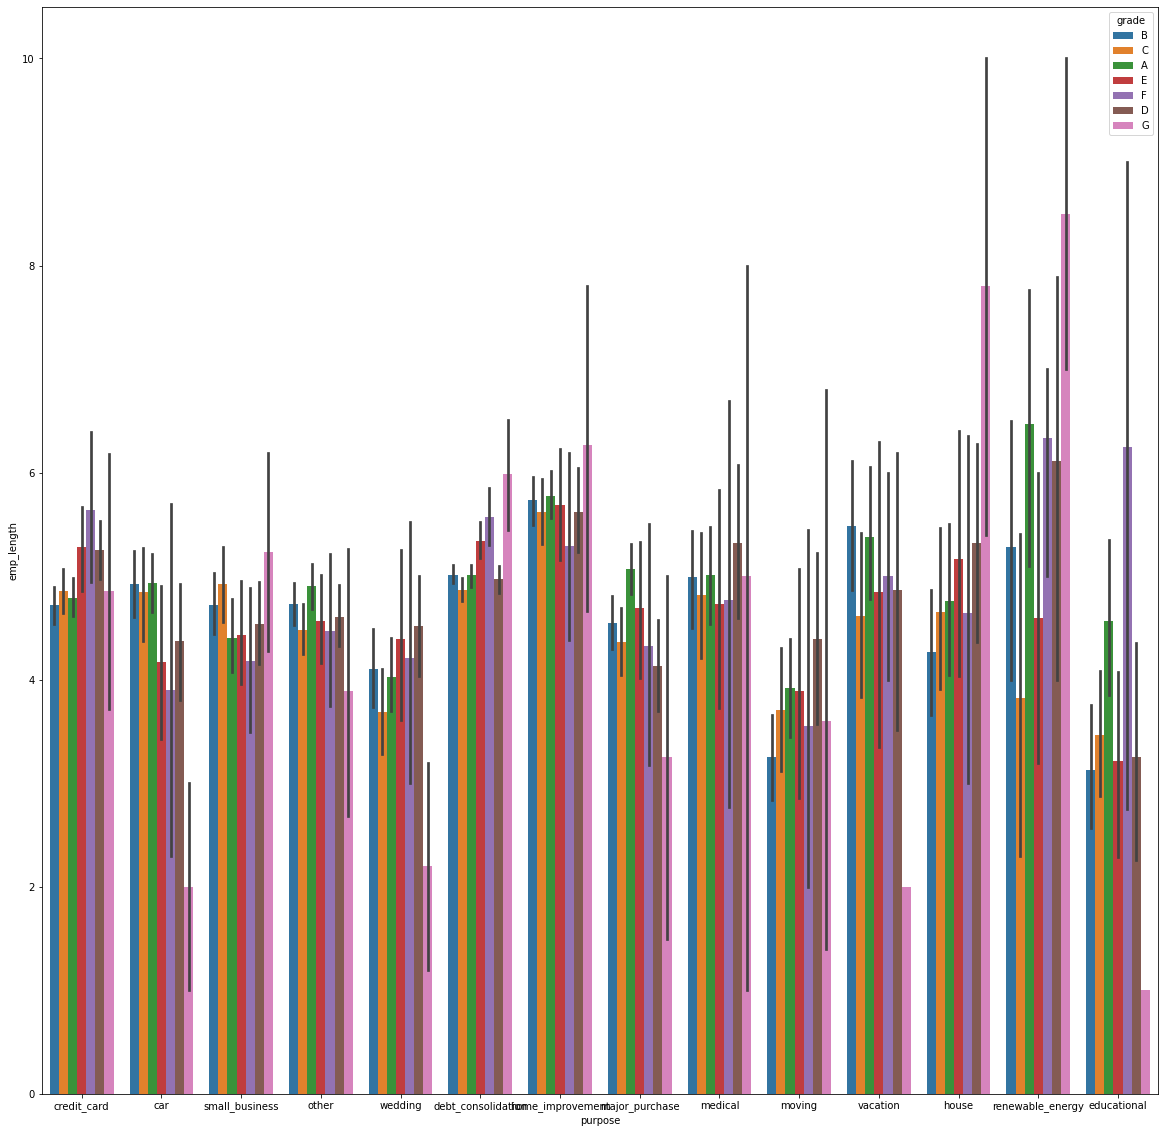

In [56]:
plt.figure(figsize=[20,20])
sns.barplot(x="purpose", y="emp_length", hue="grade", data=loan)
plt.show()

## 4.1 Most Important Predictors: Categorical Variables

This function returns the standard deviation of the default rate of a value in a categorical column

In [57]:
def getStandardDeviationOfDefaultRateCategorical(column):
    unique_values = loan[column].unique()
    default_rate = []
    for value in unique_values:
        default_rate.append(len(loan[(loan[column]==value) & (loan["loan_status"]==1)])/len(loan[loan[column]==value]))

    df = pd.DataFrame(default_rate,columns=["default_rate"])
    return round(df["default_rate"].std(), 2)

This function return the standard deviation of a list of categorical columns sorted by the standard deviation in descending order

In [58]:
def standardDeviationOfCategoricalColumns(column_list):
    deviation = {}
    for column in column_list:
        deviation[column] = getStandardDeviationOfDefaultRateCategorical(column)
    return {k: v for k, v in sorted(deviation.items(), key=lambda item: item[1], reverse=True)}


In [59]:
standardDeviationOfCategoricalColumns(["term", "grade", "purpose", "sub_grade", "emp_length", "home_ownership", "verification_status", "addr_state"])

{'sub_grade': 0.11,
 'term': 0.1,
 'grade': 0.1,
 'addr_state': 0.08,
 'home_ownership': 0.07,
 'purpose': 0.04,
 'emp_length': 0.03,
 'verification_status': 0.02}

The significant categorical predictors are grade, sub grade and term

## 4.2 Most Important Predictors: Numerical variables

This function returns the standard deviation of the default rate of a value in a numeric column

In [60]:
def getStandardDeviationOfDefaultRateNumeric(column):
    loan[column + "_cut"] = pd.qcut(loan[column], q=4, precision=0)
    unique_values = loan[column + "_cut"].unique()
    default_rate = []
    for value in unique_values:
        default_rate.append(len(loan[(loan[column + "_cut"]==value) & (loan["loan_status"]==1)])/len(loan[loan[column + "_cut"]==value]))

    df = pd.DataFrame(default_rate,columns=["default_rate"])
    return round(df["default_rate"].std(), 2)

This function return the standard deviation of a list of numeric columns sorted by the standard deviation in descending order

In [61]:
def standardDeviationOfNumericColumns(column_list):
    deviation = {}
    for column in column_list:
        deviation[column] = getStandardDeviationOfDefaultRateNumeric(column)
    return {k: v for k, v in sorted(deviation.items(), key=lambda item: item[1], reverse=True)}

In [62]:
standardDeviationOfNumericColumns(["loan_amnt", "funded_amnt", "funded_amnt_inv", "int_rate", "installment", "annual_inc"])

{'int_rate': 0.08,
 'loan_amnt': 0.03,
 'funded_amnt': 0.03,
 'annual_inc': 0.03,
 'funded_amnt_inv': 0.02,
 'installment': 0.01}

The significant numerical predictor is interest rate

# End of case study